#Agenda
1. Motivación
2. Audiencia
3. Definición del objetivo
4. Contexto Comercial
5. Problema Comercial
6. Storytelling
7. Exploratory Data Analytics
8. Análisis Univariado y Bivariado
9. Feature Engineering
10. Mejores hiperparámetros y utilización de modelos con FE
11. Mejores hiperparámetros y utilización de modelos con PCA












#1 - Motivación
El presente proyecto tratará el tema de la diabetes, enfermedad crónica que afecta la capacidad del cuerpo de producir o utilizar insulina, lo que lleva a elevados niveles de glucosa en sangre. Es una enfermedad que afecta a uno de cada diez argentinos, con el agravante de que cuatro de cada diez desconocen su condición (fuente: Argentina.gob.ar), y a 442 millones de personas en el mundo aproximadamente, situación que se agrava con el pasar de los años y se prevé que esta tendencia continúe, dándole carácter de pandemia global.

Dado que es imperativo poder sacar conclusiones rápidamente en relación a esta enfermedad, es que se ha decidido hacer análisis sobre un dataset, cuya fuente es Kaggle.com, que contiene diferentes parámetros (si una persona en cuestión es fumadora, sedentaria, qué tan buena es su salud mental, etc.). La idea es poder observar si estos parámetros están relacionados con esta enfermedad y, de ser el caso, cuáles tienen mayor impacto, de modo de poder sacar conclusiones y tomar un curso de acción determinado.

En este desafío se realizarán análisis univariados, para entender las variables que resulten interesantes de manera individual, análisis bivariado, para entender relaciones entre pares de variables y poder visualizar patrones entre las mismas y análisis multivariado, para visualizar relaciones entre tres variables o más. También se realizarán cálculos adicionales, como tratamiento de valores nulos, si es que fuera pertinente.

La conclusión a la que se pretende arribar es detectar si, efectivamente, algunas de las variables de las que se sospecha están relacionadas con la diabete o descartar la idea, si es que en los diferentes análisis no se observaran patrones que indiquen algún tipo de correspondencia.

#2 - Audiencia
Las audiencias potenciales del presente trabajo pueden ser:

Médicos y otros profesionales de la salud podrían estar interesados en los resultados del presente trabajo.
Organizaciones gubernamentales de carácter nacional e internacional, cuyo foco es la salud.
Prensa especializada en salud y prensa en general, en menor medida.

#4 - Contexto Comercial
Dado el gran impacto de la diabetes en la salud pública, se pretende que este proyecto esté alineado con los actores mencionados anteriormente (médicos, organizaciones de la salud, prensa especializada, etc) de manera de abordar esta problemática global. Dada la audiencia a la que se apunta, es importante asegurarse que los resultados obtenidos estén respaldados por evidencia científica sólida.

#5 - Problema Comercial
El objetivo de este proyecto es dar formato a los datos dados y responder mediante visualizaciones y otras herramientas a preguntas como las siguientes, pero no se descarta agregar más preguntas a medida que surjan:

¿Existe relación entre la salud física de una persona y la diabetes?
¿Existe relación entre la salud mental de una persona y la diabetes?
¿La edad es un factor importante en relación a la diabetes?
¿La diabetes tiene mayor preponderancia según el sexo de una persona?
¿El índice de masa corporal es un factor a considerar para determinar si una persona es diabética?
¿La presión arterial es un factor relevante en relación a la diabetes?

#6 - Storytelling

El presente trabajo trata sobre diabetes: esta enfermedad es la novena causa de muertes en el mundo según datos de la OMS. Dicha enfermedad se caracteriza por los elevados niveles de azucar en sangre, esto ocurre cuando el cuerpo no produce suficiente insulina, o cuando las celulas no responden adecuadamente a la insulina que se produce.

Hay que hacer la distinción entre diabetes tipo 1 y tipo 2: la primera es una enfermedad autoinmune, en la que el propio sistema inmunológico ataca las células beta del páncreas, que se encargan de producir la insulina.

Por otro lado, la diabetes tipo 2 es una enfermedad adquirida, provocada por factores genéticos, estilo de vida y el entorno. Los factores de riesgo en la diabetes tipo 2 son la obesidad, la falta de actividad física y la mala alimentación.

Para este trabajo se hará uso de un dataset que contiene diversos datos sobre personas como su salud física, mental, qué tipo de alimentación tiene: si come verduras, si fuma, si bebe alcohol, etc, y además se indica si dicha persona es diabética. Por lo tanto, la idea es ver cuáles de esos parámetros afecta más, o si puede verse algún patrón que nos pueda ayudar a sacar alguna conclusión. Dado que este dataset incluye factores que afectan más a la diabetes tipo 2, se hará hincapié en los pacientes con ese tipo de diabetes.

Sería interesante tener un dataset más detallado sobre qué tipo de alimento consumen las personas, de manera de ver si aquellas que consumen alimentos ultraprocesados (aquellos alimentos que fueron desprovistos de sus nutrientes y se les adiciona sales, azúcares, grasas, etc para hacerlos adictivos) tienen tendencia a desarrollar diabetes por sobre aquellos que se alimentan de manera más equilibrada.

Entonces, con los datos que poseemos, intentaremos responder algunas preguntas:


*   ¿Hay relación entre la diabetes y la salud general de la persona?
*   ¿Hay relación entre la diabetes y el Índice de Masa Corporal?
*   ¿Hay relación entre la diabetes y la salud física de la persona?
*   ¿Hay relación entre la diabetes y la salud mental de la persona?
*   ¿Hay relación entre la diabetes y la educación de la persona?
*   Si tomamos la población de fumadores, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?
*   Si tomamos la población de gente con el colesterol alto, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?
*   Si tomamos la población de gente con presión sanguinea alta, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

Todas estas preguntas intentarán ser respondidas en el presente proyecto:










#7 - Exploratory Data Analytics

In [ ]:
#Instalo la librería Scikit-learn Optimize

!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 878.5 kB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

In [ ]:
#Importo las librerías.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats

#Librerías de tratamiento de nulos

import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

#Librerías de clasificación

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from skopt import BayesSearchCV

#Librerías de métricas

from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Abro el archivo CSV en un dataframe.

ruta_diabetes = '/content/gdrive/MyDrive/PreEntrega_3_DS/Dataset_IndicadoresDiabetes.csv'
dfdiabetes = pd.read_csv(ruta_diabetes)

In [ ]:
#Imprimo las primeras cinco filas del dataframe.

print(dfdiabetes.head())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

In [ ]:
#El dataset posee muchas columnas floats que deben convertirse a categóricas

Vector_Columnas = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
dfdiabetes[Vector_Columnas] = dfdiabetes[Vector_Columnas].astype('category')
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

In [ ]:
#Observamos si hay datos nulos en el dataset y si existen valores duplicados.

dfdiabetes.isnull().sum()

Duplicados = dfdiabetes[dfdiabetes.duplicated()]

#print(Duplicados)

dfdiabetes = dfdiabetes.drop_duplicates()

print(dfdiabetes)

       HeartDiseaseorAttack HighBP HighChol CholCheck   BMI Smoker Stroke  \
0                       0.0    1.0      1.0       1.0  40.0    1.0    0.0   
1                       0.0    0.0      0.0       0.0  25.0    1.0    0.0   
2                       0.0    1.0      1.0       1.0  28.0    0.0    0.0   
3                       0.0    1.0      0.0       1.0  27.0    0.0    0.0   
4                       0.0    1.0      1.0       1.0  24.0    0.0    0.0   
...                     ...    ...      ...       ...   ...    ...    ...   
253675                  0.0    1.0      1.0       1.0  45.0    0.0    0.0   
253676                  0.0    1.0      1.0       1.0  18.0    0.0    0.0   
253677                  0.0    0.0      0.0       1.0  28.0    0.0    0.0   
253678                  0.0    1.0      0.0       1.0  23.0    0.0    0.0   
253679                  1.0    1.0      1.0       1.0  25.0    0.0    0.0   

       Diabetes PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth 

##Tratamiento de outliers

In [ ]:
#Calculamos Q1 y Q3

columnas_numericas = dfdiabetes.select_dtypes(include=['float64'])

columnas_categoricas = dfdiabetes.select_dtypes(include=['category'])

# Calcular los percentiles para cada columna float64

percentiles = columnas_numericas.apply(lambda x: np.percentile(x, [25, 50, 75]))

# Calcular el rango intercuartílico (IQR) para cada columna float64
IQR = percentiles.iloc[2] - percentiles.iloc[0]

# Defino los límites inferior y superior para considerar outliers

limite_inferior = percentiles.iloc[0] - 1.5*IQR
limite_superior = percentiles.iloc[2] + IQR

# Identificar outliers en cada columna float64 y guardar los datos sin outliers en un dataframe

dfdiabetes_sin_outliers = dfdiabetes[(columnas_numericas >= limite_inferior) & (columnas_numericas <= limite_superior)]

dfdiabetes_sin_outliers[columnas_categoricas.columns] = dfdiabetes[columnas_categoricas.columns]

#dfdiabetes_sin_outliers = dfdiabetes_sin_outliers.dropna()

# Restablezco el índice

dfdiabetes_sin_outliers = dfdiabetes_sin_outliers.reset_index(drop=True)

#Imprimo

print(dfdiabetes_sin_outliers)

#Guardo el csv generado para revisión

dfdiabetes_sin_outliers.to_csv('/content/dfdiabetes_sin_outliers.csv', index=False)



       HeartDiseaseorAttack HighBP HighChol CholCheck   BMI Smoker Stroke  \
0                       0.0    1.0      1.0       1.0  40.0    1.0    0.0   
1                       0.0    0.0      0.0       0.0  25.0    1.0    0.0   
2                       0.0    1.0      1.0       1.0  28.0    0.0    0.0   
3                       0.0    1.0      0.0       1.0  27.0    0.0    0.0   
4                       0.0    1.0      1.0       1.0  24.0    0.0    0.0   
...                     ...    ...      ...       ...   ...    ...    ...   
229776                  0.0    1.0      1.0       1.0   NaN    0.0    0.0   
229777                  0.0    1.0      1.0       1.0  18.0    0.0    0.0   
229778                  0.0    0.0      0.0       1.0  28.0    0.0    0.0   
229779                  0.0    1.0      0.0       1.0  23.0    0.0    0.0   
229780                  1.0    1.0      1.0       1.0  25.0    0.0    0.0   

       Diabetes PhysActivity Fruits  ... AnyHealthcare NoDocbcCost GenHlth 

##Tratamiento de nulos con Missigno.

<Axes: >

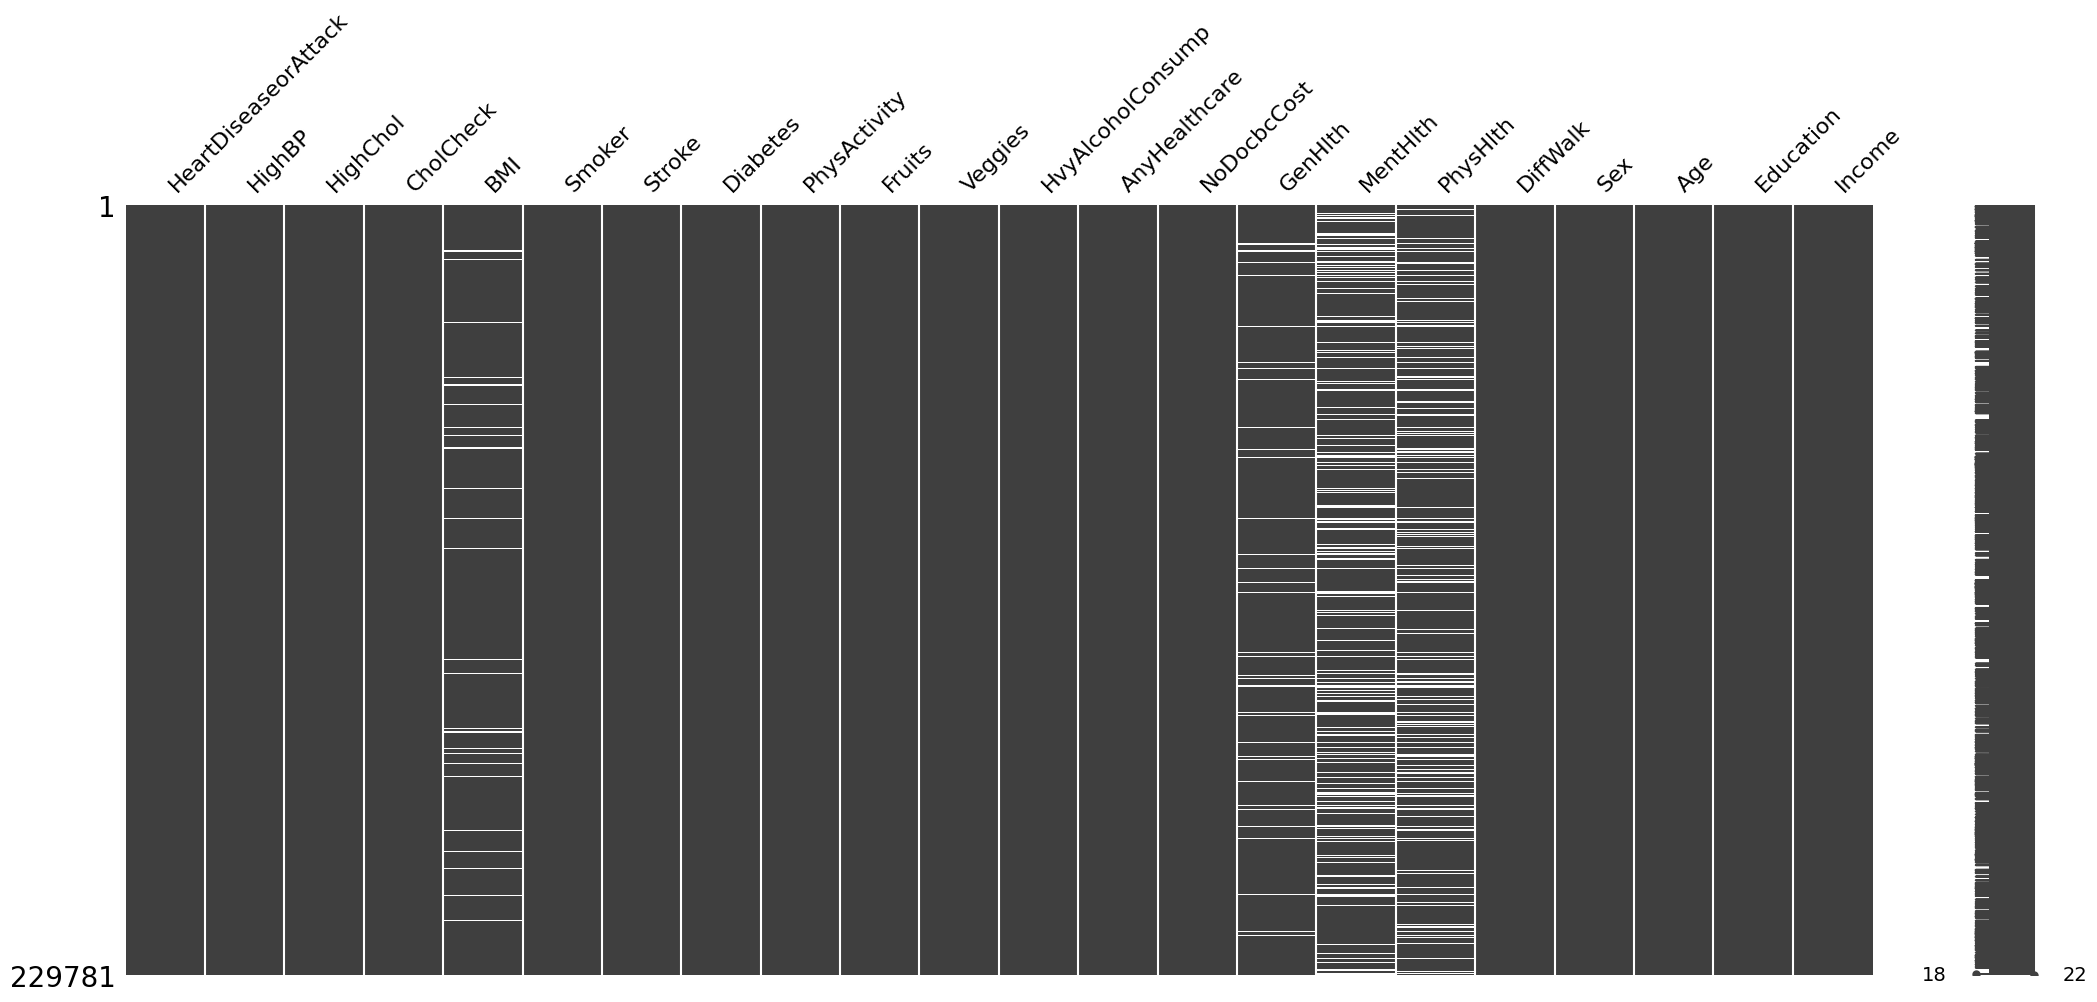

In [ ]:
# Observo que aparecen algunos valores nulos en el nuevo dataframe, así que los vamos a visualizar con Missigno.

msno.matrix(dfdiabetes_sin_outliers)

<Axes: >

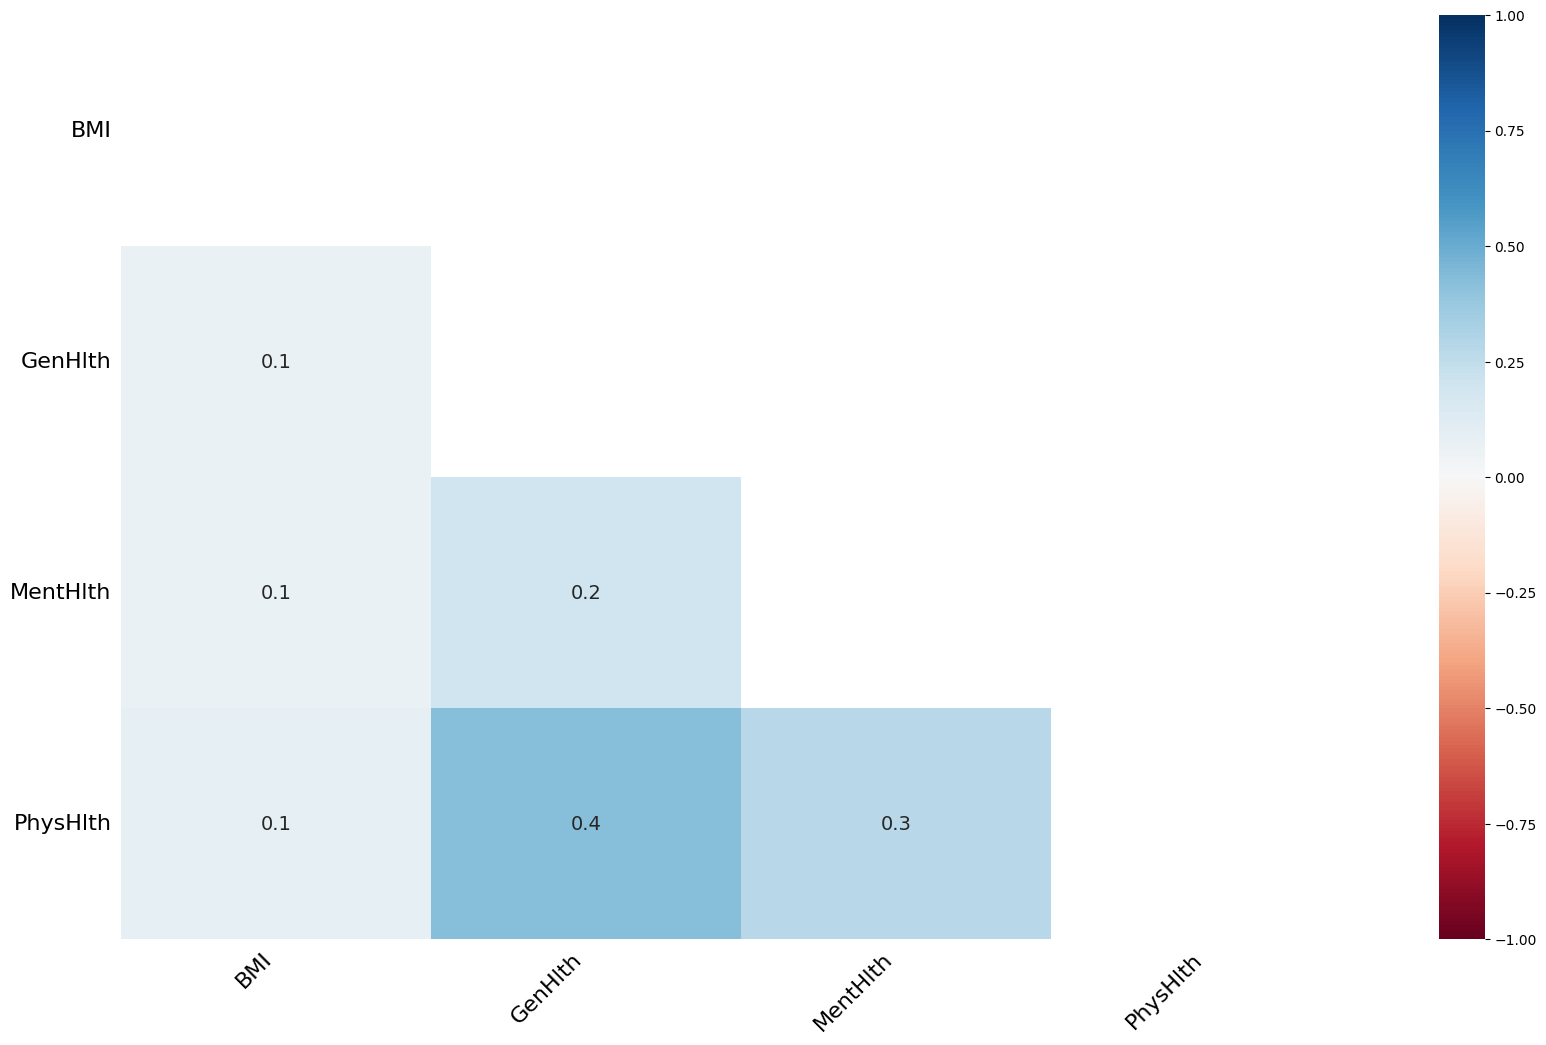

In [ ]:
#Ahora observo si hay correlación entre las features.

msno.heatmap(dfdiabetes_sin_outliers)

<Axes: >

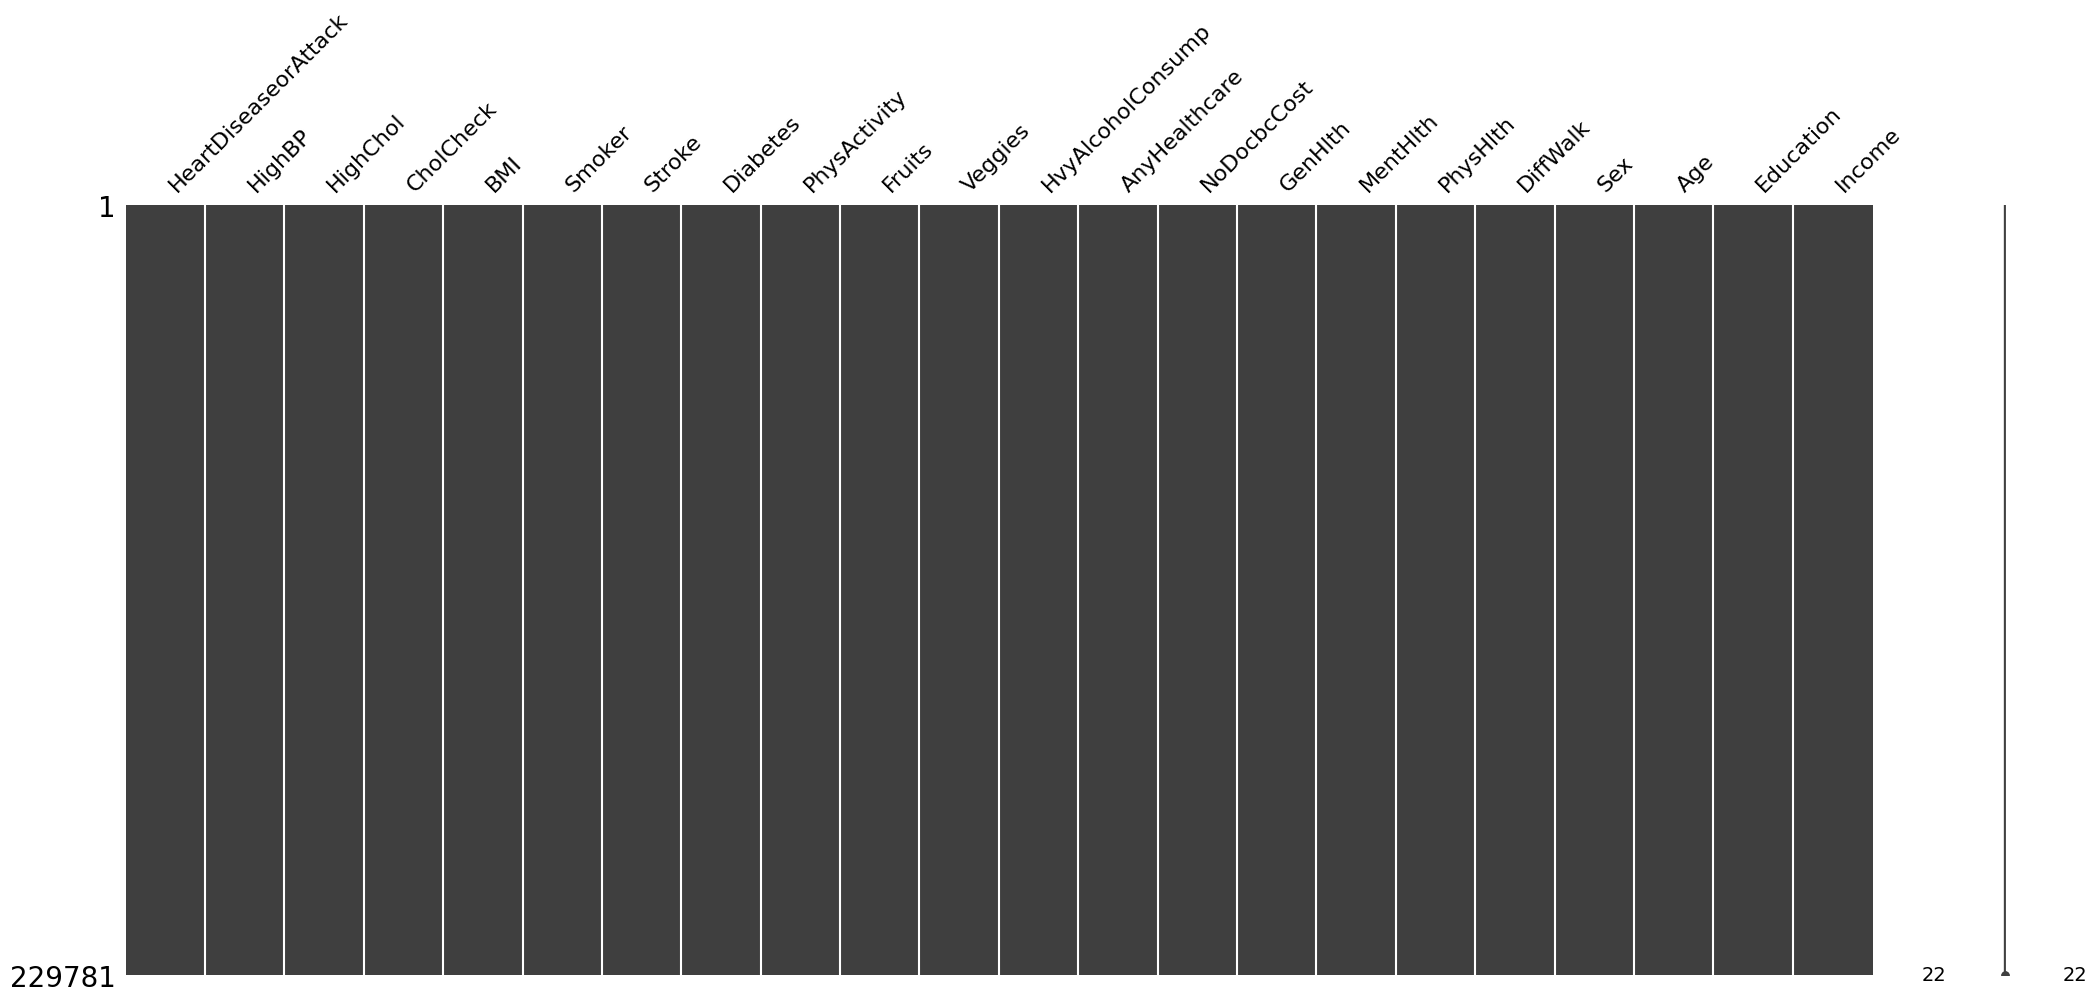

In [ ]:
# Dado que las correlaciones en el heatmap son, a lo sumo, moderadas, no puedo suponer MAR, MNAR o MCAR solamente con esta información

imputer = IterativeImputer(max_iter = 10, random_state=10000)

dfdiabetes_sin_nulos = pd.DataFrame(imputer.fit_transform(dfdiabetes_sin_outliers), columns=dfdiabetes_sin_outliers.columns)

msno.matrix(dfdiabetes_sin_nulos)


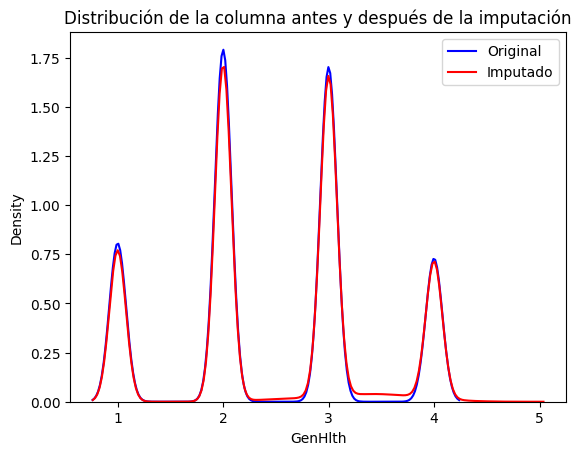

In [ ]:
# Comparo la distribución de la columna GenHlth(la que mayor cantidad de nulos tiene) antes y después de la imputación

sns.kdeplot(dfdiabetes_sin_outliers['GenHlth'], label='Original', color='blue')

sns.kdeplot(dfdiabetes_sin_nulos['GenHlth'], label='Imputado', color='red')

plt.legend()

plt.title('Distribución de la columna antes y después de la imputación')

plt.show()

In [ ]:
stats_dfsinoutliers = dfdiabetes_sin_outliers.describe()

stats_dfsinnulos = dfdiabetes_sin_nulos.describe()

print(stats_dfsinoutliers)

print(stats_dfsinnulos)

                 BMI        GenHlth      MentHlth       PhysHlth  \
count  218310.000000  217703.000000  184705.00000  189667.000000   
mean       27.696368       2.468064       0.38280       0.883628   
std         4.944380       0.927079       0.92528       1.749833   
min        12.000000       1.000000       0.00000       0.000000   
25%        24.000000       2.000000       0.00000       0.000000   
50%        27.000000       2.000000       0.00000       0.000000   
75%        31.000000       3.000000       0.00000       1.000000   
max        40.000000       4.000000       4.00000       8.000000   

                 Age      Education         Income  
count  229781.000000  229781.000000  229781.000000  
mean        8.086582       4.980568       5.890383  
std         3.093809       0.992895       2.092477  
min         1.000000       1.000000       1.000000  
25%         6.000000       4.000000       5.000000  
50%         8.000000       5.000000       6.000000  
75%        10.00

#8 - Análisis Univariado y Bivariado

##Análisis univariado

La intención en esta sección es representar gráficamente las variables individualmente para sacar conclusiones. En el caso particular de este dataset, para observar cómo están distribuidos los datos en algunas de las variables que considero pertinentes y que pueden tener impacto en la enfermedad tratada en este trabajo.

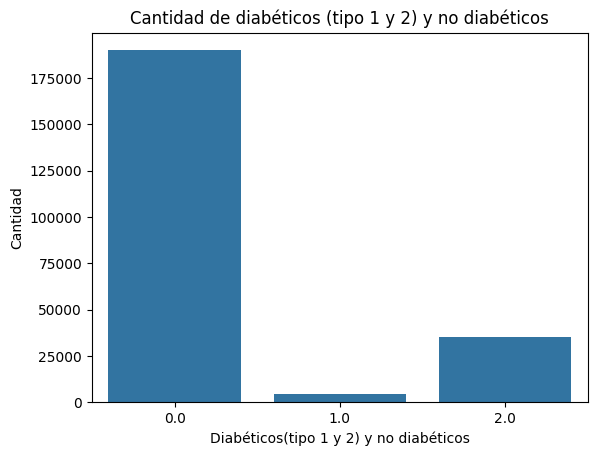

In [ ]:
#Grafico la población de diabéticos

sns.countplot(data = dfdiabetes_sin_nulos, x = 'Diabetes')

#Agrego el título

plt.title('Cantidad de diabéticos (tipo 1 y 2) y no diabéticos')

#Coloco el nombre a los ejes

plt.xlabel('Diabéticos(tipo 1 y 2) y no diabéticos')
plt.ylabel('Cantidad')

#Muestro el gráfico, las referencias son: 1:  Fumador, 2: No fumador

plt.show()

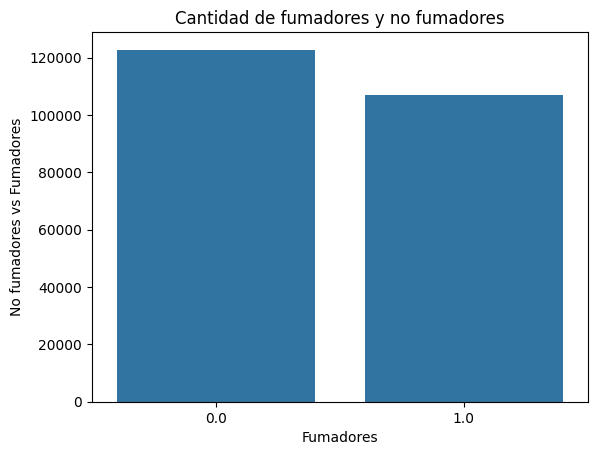

In [ ]:
#Grafico la población de fumadores y no fumadores

sns.countplot(data = dfdiabetes_sin_nulos, x = 'Smoker')

#Agrego el título

plt.title('Cantidad de fumadores y no fumadores')

#Coloco el nombre a los ejes

plt.xlabel('Fumadores')
plt.ylabel('No fumadores vs Fumadores')

#Muestro el gráfico, las referencias son: 1:  Fumador, 2: No fumador

plt.show()

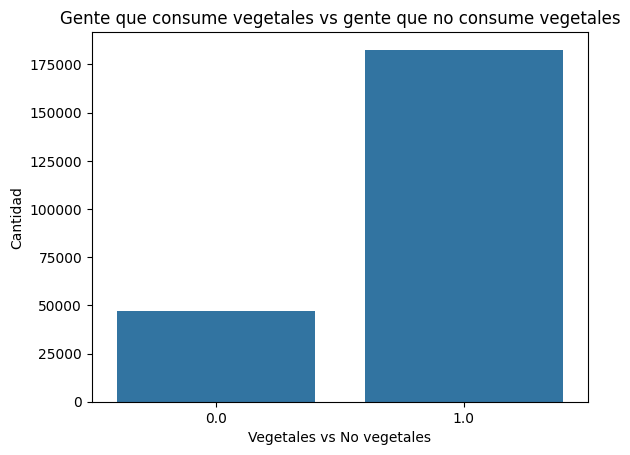

In [ ]:
#Grafico la cantidad de gente que consume vegetales al menos una vez por día

sns.countplot(data = dfdiabetes_sin_nulos, x = 'Veggies')

#Agrego un título

plt.title('Gente que consume vegetales vs gente que no consume vegetales')

#Nombro los ejes

plt.xlabel('Vegetales vs No vegetales')
plt.ylabel('Cantidad')

#Muestro el gràfico, referencia: 0: No consume vegetales, 1: Consume vegetales

plt.show()

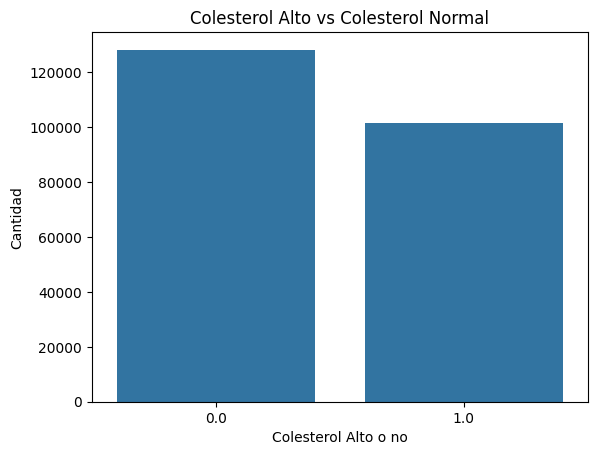

In [ ]:
#Grafico la cantidad de gente con colesterol alto vs las que no.

sns.countplot(data = dfdiabetes_sin_nulos, x = 'HighChol')

#Agrego un título

plt.title('Colesterol Alto vs Colesterol Normal' )

#Nombro los ejes

plt.xlabel('Colesterol Alto o no')
plt.ylabel('Cantidad')

#Muestro el gráfico, referencia: 0: Colesterol Alto, 1: Colesterol Bajo

plt.show()

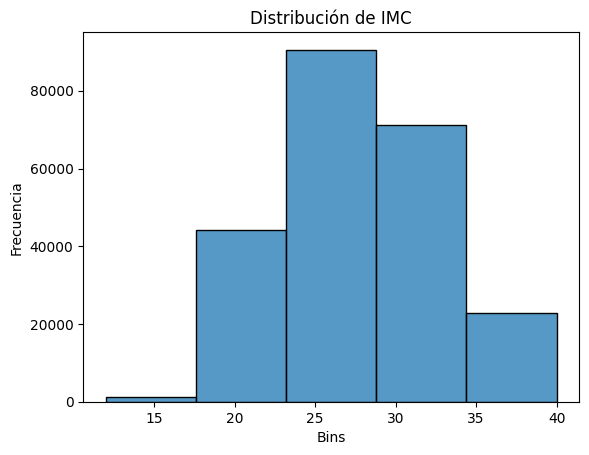

In [ ]:
#Grafico un histograma para ver cómo están distribuidas las edades

sns.histplot(data =dfdiabetes_sin_nulos, x = 'BMI', bins = 5)

#Agrego un título

plt.title('Distribución de IMC')

#Agrego los ejes

plt.xlabel('Bins')
plt.ylabel('Frecuencia')

plt.show()

Análisis bivariado

La intención en esta sección es graficar dos variables, con el objetivo de observar si existe alguna correlación entre las mismas. Dichas variables deberían ser pertinentes de analizar, de manera de sacar conclusiones y poder seguir un curso de acción.

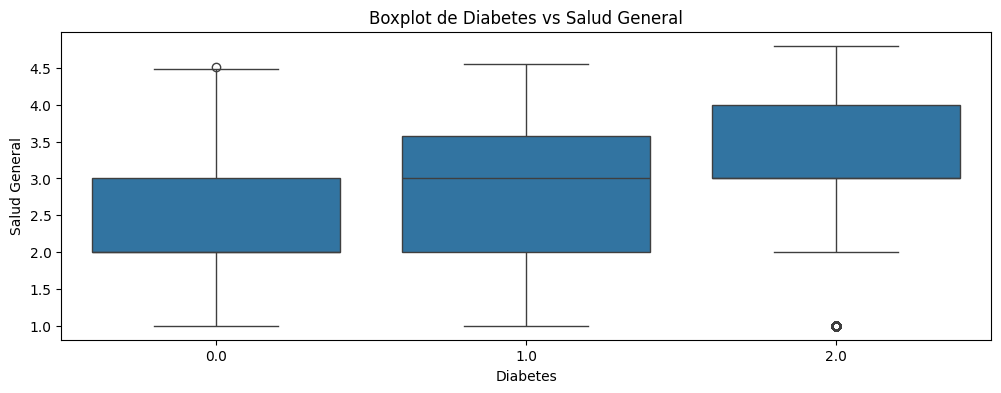

In [ ]:
#¿Hay relación entre la diabetes y la salud general de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_nulos, x='Diabetes', y='GenHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud General')
plt.xlabel('Diabetes')
plt.ylabel('Salud General')

#Muestro el gráfico

plt.show()

Aquí podemos observar la incidencia de la salud general en la diabetes tipo 2. El resultado es previsible, dado que mientras peor sean sus hábitos alimenticios y físicos, es más probable que contraiga diabetes tipo 2. En diabetes tipo 1 se puede observar un espectro amplio de valores, pero esta es una diabetes autoinmune no causada por los hábitos de la persona.

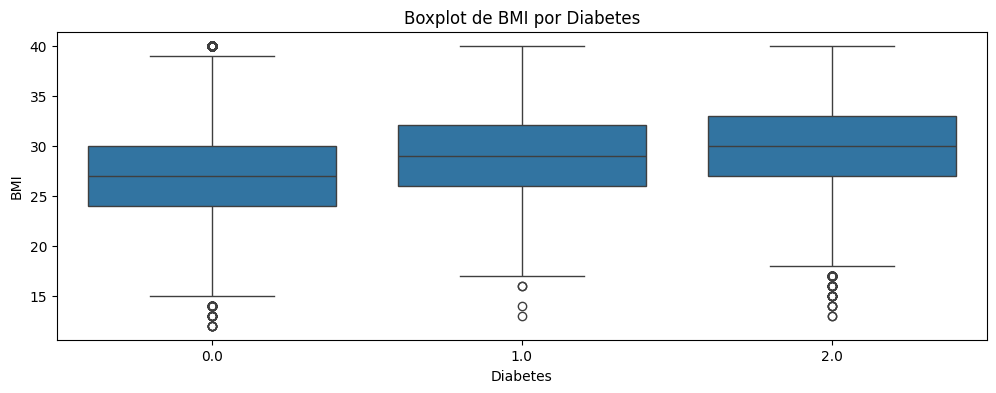

In [ ]:
#¿Hay relación entre la diabetes y el Índice de Masa Corporal?

plt.figure(figsize = (12,4))
sns.boxplot(data=dfdiabetes_sin_nulos, x='Diabetes', y='BMI')

#Coloco título y nombro los ejes

plt.title('Boxplot de BMI por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('BMI')

#Muestro el gráfico

plt.show()

En este caso, podemos ver una leve diferencia en el IMC de los no diabéticos, diabéticos tipo 1 y 2. Como es natural, la diabetes tipo 2 es la que alcanza los valores de IMC, muchos llegando a valores de sobrepeso y obesidad (descontamos los valores alejados, que son valores sin un sentido físico para este caso).

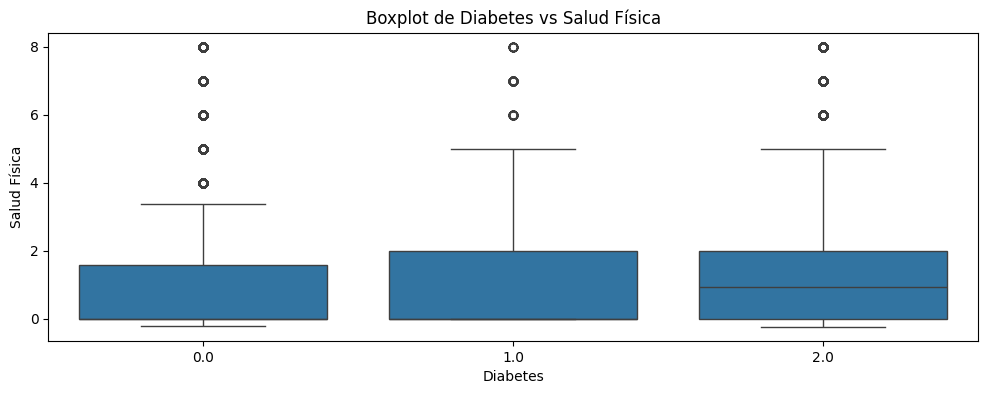

In [ ]:
#¿Hay relación entre la diabetes y la salud física de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_nulos, x='Diabetes', y='PhysHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud Física')
plt.xlabel('Diabetes')
plt.ylabel('Salud Física')

#Muestro el gráfico

plt.show()

En este caso, observamos un rango de valores relativamente amplio para diabetes tipo 1 y 2, pero siendo diabetes 2 la que alcanza los valores más altos de peor salud física, lo cual es esperable.

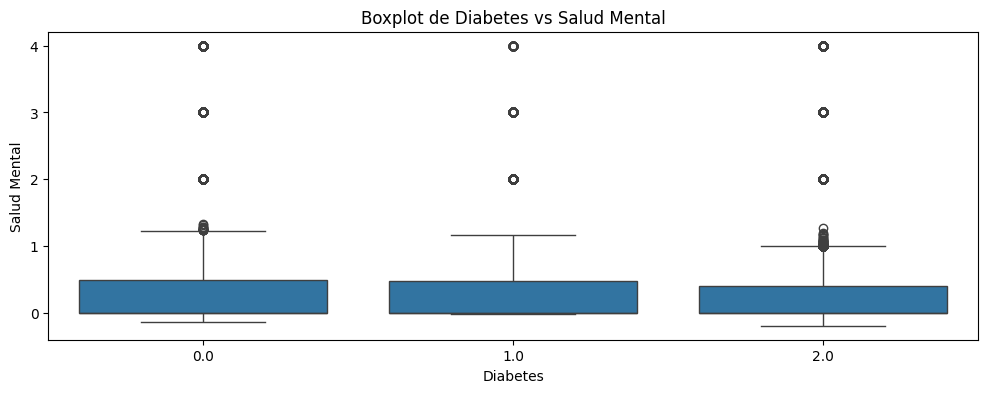

In [ ]:
#¿Hay relación entre la diabetes y la salud mental de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_nulos, x='Diabetes', y='MentHlth')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Salud Mental')
plt.xlabel('Diabetes')
plt.ylabel('Salud Mental')

#Muestro el gráfico

plt.show()

En este caso, no pueden verse diferencias muy significativas entre los tres grupos, tal vez el grupo de diabetes tipo 1 tiene valores de salud mental ligeramente más alto.

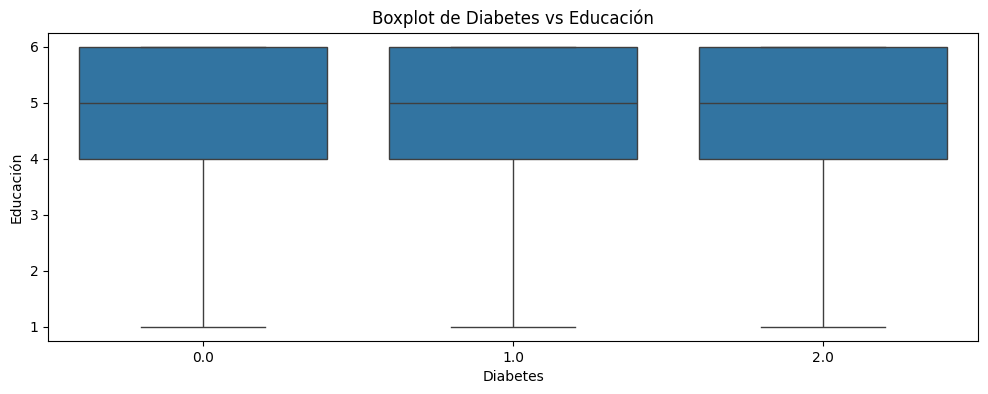

In [ ]:
#¿Hay relación entre la diabetes y la educación de la persona?

plt.figure(figsize = (12,4))
sns.boxplot(data = dfdiabetes_sin_nulos, x='Diabetes', y='Education')

#Coloco título y nombro los ejes

plt.title('Boxplot de Diabetes vs Educación')
plt.xlabel('Diabetes')
plt.ylabel('Educación')

#Muestro el gráfico

plt.show()

En este caso, no puede verse diferencia entre los tres grupos, por lo que cabe pensar que no hay relación entre la diabetes y el nivel educativo de la persona en cuestión.

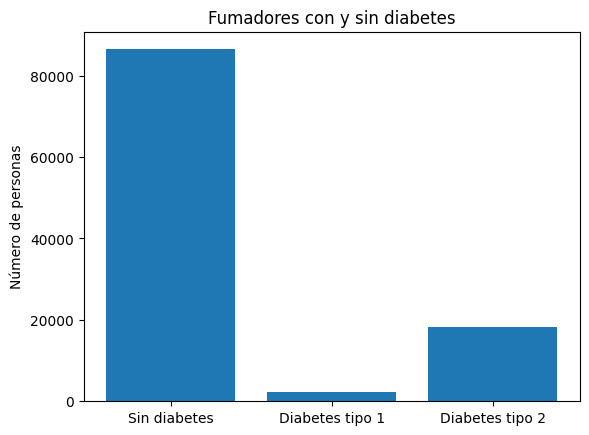

Diabetes
0.0    86496
2.0    18223
1.0     2281
Name: count, dtype: int64


In [ ]:
#Si tomamos la población de fumadores, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

Smokers = dfdiabetes_sin_nulos[dfdiabetes_sin_nulos['Smoker'] == 1]

conteo_diabetes = Smokers['Diabetes'].value_counts()

#Seteamos los ejes y graficamos

fig, ax = plt.subplots()
ax.bar(conteo_diabetes.index, conteo_diabetes.values)
ax.set_xticks(conteo_diabetes.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Fumadores con y sin diabetes')
plt.show()
print(conteo_diabetes)

Observamos que el grupo más grande de fumadores no tiene diabetes. Los diabéticos tipo 2 que son fumadores representan el segundo escalafón en lo referido a cantidad. Finalmente, la cantidad de diabéticos tipo 1 que fuman es muy pequeña.

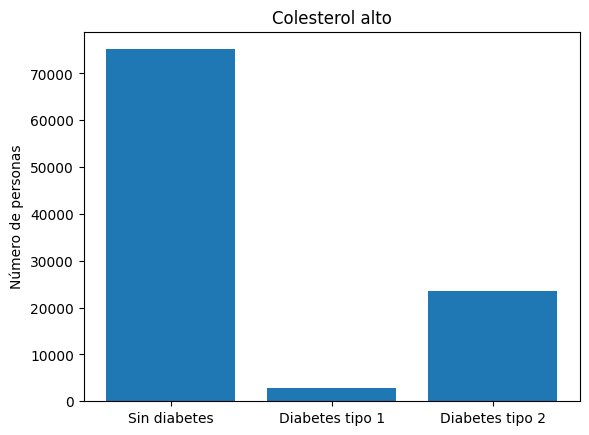

Diabetes
0.0    75138
2.0    23496
1.0     2874
Name: count, dtype: int64


In [ ]:
#Si tomamos la población de gente con el colesterol alto, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

#Contamos cuántas personas hay con colesterol alto y observamos cuántas hay con cada tipo de diabetes

H_chol = dfdiabetes_sin_nulos[dfdiabetes_sin_nulos['HighChol'] == 1]

conteo_diabetes_hc = H_chol['Diabetes'].value_counts()

#Seteamos ejes, título y graficamos

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_hc.index, conteo_diabetes_hc.values)
ax.set_xticks(conteo_diabetes_hc.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Colesterol alto')
plt.show()
print(conteo_diabetes_hc)

Este caso se parece bastante al anterior, la gente con colesterol alto que no tiene diabetes representa la mayoría de la muestra (probablementente debido a la naturaleza del dataset) y la gente con diabetes tipo 2 en segundo lugar, lo cual tiene sentido, dado que sabemos cómo afecta el colesterol alto a provocar diabetes tipo 2.

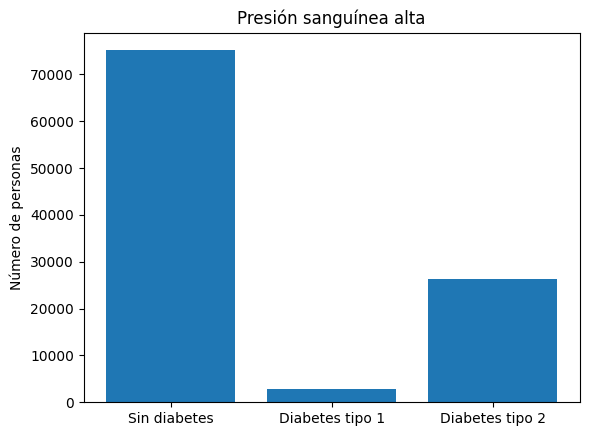

Diabetes
0.0    75105
2.0    26405
1.0     2912
Name: count, dtype: int64


In [ ]:
#Si tomamos la población de gente con presión sanguínea alta, ¿se puede concluir que hay una gran proporción de diabéticos entre ellos?

#Contamos cuántas personas hay con presión sanguínea alta y observamos cuántas hay con cada tipo de diabetes

H_BloodPress = dfdiabetes_sin_nulos[dfdiabetes_sin_nulos['HighBP'] == 1]

conteo_diabetes_hbp = H_BloodPress['Diabetes'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_hbp.index, conteo_diabetes_hbp.values)
ax.set_xticks(conteo_diabetes_hbp.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Presión sanguínea alta')
plt.show()
print(conteo_diabetes_hbp)

Otra vez se puede ver un gráfico muy parecido a los anteriores, podemos ver cierta relación entre presión sanguínea alta y diabetes tipo 2, lo cual no debe sorprendernos. Otra vez el grupo más grande es el que no tiene diabetes y el de diabetes tipo 1 es un grupo muy pequeño.

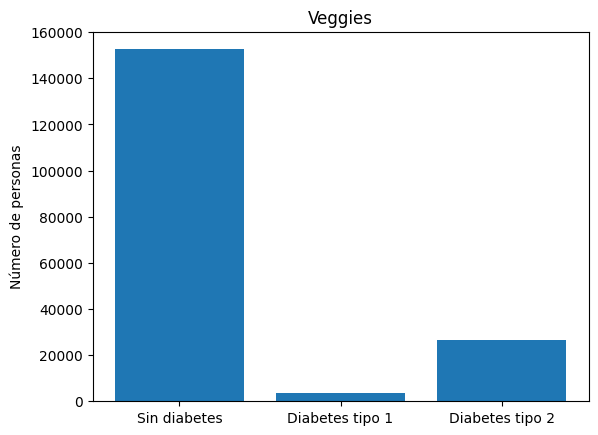

Diabetes
0.0    152579
2.0     26495
1.0      3559
Name: count, dtype: int64


In [ ]:
#La gente que come verduras al menos una vez al día, ¿tiene una menor tendencia a tener diabetes?

#Contamos cuántas personas comen verduras y observamos cuántas hay con cada tipo de diabetes.

Veggie = dfdiabetes_sin_nulos[dfdiabetes_sin_nulos['Veggies'] == 1]

conteo_diabetes_veggies = Veggie['Diabetes'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_veggies.index, conteo_diabetes_veggies.values)
ax.set_xticks(conteo_diabetes_veggies.index)
ax.set_xticklabels(['Sin diabetes', 'Diabetes tipo 2', 'Diabetes tipo 1'])
ax.set_ylabel('Número de personas')
ax.set_title('Veggies')
plt.show()
print(conteo_diabetes_veggies)

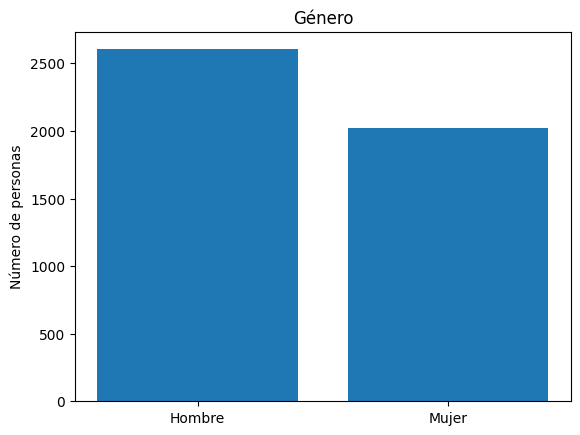

Sex
0.0    2604
1.0    2025
Name: count, dtype: int64


In [ ]:
#¿Hay una mayor tendencia a tener diabetes según el sexo de la persona?


Diabetes_count = dfdiabetes_sin_nulos[dfdiabetes_sin_nulos['Diabetes'] == 1]

conteo_diabetes_genero = Diabetes_count['Sex'].value_counts()

#Graficamos utilizando otro gráfico de barras.

fig, ax = plt.subplots()
ax.bar(conteo_diabetes_genero.index, conteo_diabetes_genero.values)
ax.set_xticks(conteo_diabetes_genero.index)
ax.set_xticklabels(['Hombre', 'Mujer'])
ax.set_ylabel('Número de personas')
ax.set_title('Género')
plt.show()
print(conteo_diabetes_genero)

En este gráfico puede verse una mayor tendencia de los hombres a tener diabetes.

#9 - Feature Engineering

El propósito de esta sección es utilizar Polynomial Features y "Canaritos" para encontrar nuevas features que tengan importancia para el modelo, así como descartar aquellas que no son de peso.

In [ ]:
#Asignación de variables

X = dfdiabetes_sin_nulos.drop('Diabetes', axis = 1)

Y = dfdiabetes_sin_nulos['Diabetes']

#Multiplico las features hasta grado 2.

poly = PolynomialFeatures(degree = 2, include_bias = False)

#columnas_numericas = X.select_dtypes(include=['float64'])

#indices = list(columnas_numericas.columns)

X_poly = poly.fit_transform(X)

#Paso los datos a un dataframe nuevo

X = pd.DataFrame(X_poly, columns = poly.get_feature_names_out(input_features = X.columns))


# Genero 20 canaritos (variables con ruido)

np.random.seed(10000)
canaritos = pd.DataFrame(np.random.rand(X.shape[0], 20), columns=[f'canarito_{i}' for i in range(20)])

# Agregar los canaritos a X
X = pd.concat([X, canaritos], axis=1)

# Dividir en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10000)

# Elijo Catboost para predecir, dado que es bueno para predecir categorías

catboost = CatBoostClassifier(iterations = 100, learning_rate = 0.1, depth = 10, verbose = False)

# Ajustar modelo
catboost.fit(X_train, y_train)

#Imprimo X con los polynomial features y canaritos

print(X)


        HeartDiseaseorAttack  HighBP  HighChol  CholCheck        BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.000000     1.0   
1                        0.0     0.0       0.0        0.0  25.000000     1.0   
2                        0.0     1.0       1.0        1.0  28.000000     0.0   
3                        0.0     1.0       0.0        1.0  27.000000     0.0   
4                        0.0     1.0       1.0        1.0  24.000000     0.0   
...                      ...     ...       ...        ...        ...     ...   
229776                   0.0     1.0       1.0        1.0  30.283749     0.0   
229777                   0.0     1.0       1.0        1.0  18.000000     0.0   
229778                   0.0     0.0       0.0        1.0  28.000000     0.0   
229779                   0.0     1.0       0.0        1.0  23.000000     0.0   
229780                   1.0     1.0       1.0        1.0  25.000000     0.0   

        Stroke  PhysActivity  Fruits  V

In [ ]:
#Observo la importancia de las features

feature_importances = pd.DataFrame({'Feature': X.columns,
                                    'Importance': catboost.feature_importances_}).sort_values(by='Importance',
                                                                                          ascending=False)
feature_importances

,Feature,Importance
221,GenHlth Age,4.656605
113,BMI Age,3.209114
108,BMI GenHlth,2.923781
64,HighChol BMI,2.814124
54,HighBP GenHlth,2.774316
...,...,...
122,Smoker AnyHealthcare,0.000000
195,HvyAlcoholConsump Education,0.000000
237,DiffWalk^2,0.000000
238,DiffWalk Sex,0.000000


Hay muchos "canaritos" que están rankeados arriba, por lo que se podría crear un dataframe nuevo con las features importantes y descartar las demás.

In [ ]:
#Creo un vector con las features importantes, considero importantes las features que están por encima de la primera "capa geológica" de canaritos

important_features = ['GenHlth Age', 'BMI Age', 'BMI GenHlth', 'HighChol BMI', 'HighBP GenHlth', 'CholCheck BMI', 'CholCheck GenHlth', 'BMI',
                       'HighBP BMI', 'CholCheck Age', 'BMI^2', 'GenHlth', 'Sex Age', 'HighChol GenHlth', 'GenHlth^2', 'HighBP Age', 'GenHlth DiffWalk',
                      'HighChol Age', 'Age', 'AnyHealthcare GenHlth']

#Creo un dataframe nuevo con las features importantes, según el análisis anterior.

df_important = X[important_features].copy()

print(df_important)

        GenHlth Age     BMI Age  BMI GenHlth  HighChol BMI  HighBP GenHlth  \
0         32.822463  360.000000   145.877612     40.000000        3.646940   
1         21.000000  175.000000    75.000000      0.000000        0.000000   
2         29.414810  252.000000    91.512742     28.000000        3.268312   
3         22.000000  297.000000    54.000000      0.000000        2.000000   
4         22.000000  264.000000    48.000000     24.000000        2.000000   
...             ...         ...          ...           ...             ...   
229776    15.000000  151.418745    90.851247     30.283749        3.000000   
229777    44.000000  198.000000    72.000000     18.000000        4.000000   
229778     2.000000   56.000000    28.000000      0.000000        0.000000   
229779    21.000000  161.000000    69.000000      0.000000        3.000000   
229780    18.000000  225.000000    50.000000     25.000000        2.000000   

        CholCheck BMI  CholCheck GenHlth        BMI  HighBP BMI

#10 - Búsqueda de los mejores hiperparámetros posibles y predicción en modelos de clasifiación

###10-1-1 BayesSearch y Catboost

In [ ]:
X = df_important

# Divido en training y testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 10000)

scaler = StandardScaler()

X_train_escalado = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_escalado = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

X_train_escalado = pd.DataFrame(X_train_escalado, columns=X_train.select_dtypes(include=['int64', 'float64']).columns, index=X_train.index)
X_test_escalado = pd.DataFrame(X_test_escalado, columns=X_test.select_dtypes(include=['int64', 'float64']).columns, index=X_test.index)

#Update de datos

X_train.update(X_train_escalado)
X_test.update(X_test_escalado)


In [ ]:
#Defino qué hiperparámetros usaré para Catboost

hiper_cboost = {
         'learning_rate': Real(0.01, 0.3, 'uniform'),
         'depth': Integer(3, 10),
         'iterations': Integer(10, 100),
}

# Instancio BayesSearchCV

cboost = CatBoostClassifier (random_state = 10000)

bayes_search_cboost = BayesSearchCV(cboost, hiper_cboost, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_cboost.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_cboost.best_params_}')

0:	learn: 0.8873534	total: 455ms	remaining: 37.3s
1:	learn: 0.7612095	total: 940ms	remaining: 38.1s
2:	learn: 0.6761108	total: 1.42s	remaining: 37.9s
3:	learn: 0.6151026	total: 1.9s	remaining: 37.4s
4:	learn: 0.5698458	total: 2.39s	remaining: 37.3s
5:	learn: 0.5362031	total: 2.88s	remaining: 36.9s
6:	learn: 0.5107497	total: 3.36s	remaining: 36.5s
7:	learn: 0.4909874	total: 3.87s	remaining: 36.3s
8:	learn: 0.4758359	total: 4.15s	remaining: 34.1s
9:	learn: 0.4639686	total: 4.42s	remaining: 32.3s
10:	learn: 0.4545595	total: 4.69s	remaining: 30.7s
11:	learn: 0.4468588	total: 4.94s	remaining: 29.2s
12:	learn: 0.4407433	total: 5.2s	remaining: 28s
13:	learn: 0.4363856	total: 5.47s	remaining: 27s
14:	learn: 0.4328182	total: 5.73s	remaining: 26s
15:	learn: 0.4299534	total: 5.98s	remaining: 25s
16:	learn: 0.4277514	total: 6.23s	remaining: 24.2s
17:	learn: 0.4255967	total: 6.51s	remaining: 23.5s
18:	learn: 0.4238714	total: 6.78s	remaining: 22.8s
19:	learn: 0.4227477	total: 7.03s	remaining: 22.1s


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Cboost = {
    'learning_rate': 0.18,
    'depth': 8,
    'iterations': 83
}

cbc = CatBoostClassifier(**Mejores_Parametros_Cboost)

cbc.fit(X_train, Y_train)

Y_pred = cbc.predict(X_test)


0:	learn: 0.8932146	total: 459ms	remaining: 37.6s
1:	learn: 0.7682702	total: 980ms	remaining: 39.7s
2:	learn: 0.6829018	total: 1.54s	remaining: 41s
3:	learn: 0.6215507	total: 1.97s	remaining: 39s
4:	learn: 0.5761282	total: 2.4s	remaining: 37.5s
5:	learn: 0.5419167	total: 2.85s	remaining: 36.5s
6:	learn: 0.5153797	total: 3.12s	remaining: 33.8s
7:	learn: 0.4950733	total: 3.37s	remaining: 31.6s
8:	learn: 0.4789466	total: 3.64s	remaining: 29.9s
9:	learn: 0.4669100	total: 3.92s	remaining: 28.6s
10:	learn: 0.4570919	total: 4.18s	remaining: 27.4s
11:	learn: 0.4497593	total: 4.32s	remaining: 25.6s
12:	learn: 0.4441168	total: 4.58s	remaining: 24.7s
13:	learn: 0.4394020	total: 4.87s	remaining: 24s
14:	learn: 0.4354707	total: 5.18s	remaining: 23.5s
15:	learn: 0.4317782	total: 5.66s	remaining: 23.7s
16:	learn: 0.4292495	total: 6.17s	remaining: 24s
17:	learn: 0.4272856	total: 6.66s	remaining: 24.1s
18:	learn: 0.4255978	total: 7.15s	remaining: 24.1s
19:	learn: 0.4239760	total: 7.64s	remaining: 24.1s

In [ ]:
# Calculo métricas


accuracy_cboost = accuracy_score(Y_test, Y_pred)

cm_cboost = confusion_matrix(Y_test, Y_pred)

precision_cboost = precision_score(Y_test, Y_pred, average = 'weighted')

recall_cboost = recall_score(Y_test, Y_pred, average = 'weighted')

f1_cboost = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_cboost)

print(cm_cboost)

print('Precision: ', precision_cboost)

print('Recall: ', recall_cboost)

print('F1 - score: ', f1_cboost)

Accuracy:  0.8464205410894321
[[55968     0  1049]
 [ 1257     0   132]
 [ 8149     0  2380]]
Precision:  0.8101904343823577
Recall:  0.8464205410894321
F1 - score:  0.808057349673321


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###10-1-2 XGBoost y BayesSearch

In [ ]:
#Ahora buscaremos los hiperparámetros "óptimos" para XGboost.

hiper_xgboost = {
         'learning_rate': Real(0.05, 0.1, 'uniform'),
         'n_estimators': Integer(100, 400),
         'max_depth': Integer(3, 7),
}

# Instancio BayesSearchCV

xgboost = XGBClassifier (n_stimators = 100, random_state = 10000)

bayes_search_xgboost = BayesSearchCV(xgboost, hiper_xgboost, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_xgboost.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_xgboost.best_params_}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:03:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('learning_rate', 0.0826184708184943), ('max_depth', 6), ('n_estimators', 281)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_XGboost = {
    'learning_rate': 0.08,
    'max_depth': 6,
    'n_stimators': 281,
}

xgb = XGBClassifier(**Mejores_Parametros_XGboost)

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:04:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculo métricas


accuracy_xgboost = accuracy_score(Y_test, Y_pred)

cm_xgboost = confusion_matrix(Y_test, Y_pred)

precision_xgboost = precision_score(Y_test, Y_pred, average = 'weighted')

recall_xgboost = recall_score(Y_test, Y_pred, average = 'weighted')

f1_xgboost = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_xgboost)

print(cm_xgboost)

print('Precision: ', precision_xgboost)

print('Recall: ', recall_xgboost)

print('F1 - score: ', f1_xgboost)

Accuracy:  0.8449408863422064
[[56026     0   991]
 [ 1262     0   127]
 [ 8309     0  2220]]
Precision:  0.8080131211133597
Recall:  0.8449408863422064
F1 - score:  0.8047692089605333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###10-1-3 LightGBM y BayesSearch

In [ ]:
#Defino qué hiperparámetros usaré para LightGBM

hiper_lgbm = {
         'learning_rate': Real(0.01, 0.1, 'uniform'),
         'max_depth': Integer(3, 10),
         'num_leaves': Integer(20, 100),
}

# Instancio BayesSearchCV

lgbm = LGBMClassifier(random_state = 10000)

bayes_search_lgbm = BayesSearchCV(lgbm, hiper_lgbm, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_lgbm.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_lgbm.best_params_}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3866
[LightGBM] [Info] Number of data points in the train set: 160846, number of used features: 20
[LightGBM] [Info] Start training from score -0.189813
[LightGBM] [Info] Start training from score -3.904874
[LightGBM] [Info] Start training from score -1.879003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Lgbm = {
    'learning_rate': 0.06,
    'max_depth': 9,
    'num_leaves': 68,
}

lgbm = LGBMClassifier(**Mejores_Parametros_Lgbm)

lgbm.fit(X_train, Y_train)

Y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3866
[LightGBM] [Info] Number of data points in the train set: 160846, number of used features: 20
[LightGBM] [Info] Start training from score -0.189813
[LightGBM] [Info] Start training from score -3.904874
[LightGBM] [Info] Start training from score -1.879003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [ ]:
# Calculo métricas


accuracy_lgbm = accuracy_score(Y_test, Y_pred)

cm_lgbm = confusion_matrix(Y_test, Y_pred)

precision_lgbm = precision_score(Y_test, Y_pred, average = 'weighted')

recall_lgbm = recall_score(Y_test, Y_pred, average = 'weighted')

f1_lgbm = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_lgbm)

print(cm_lgbm)

print('Precision: ', precision_lgbm)

print('Recall: ', recall_lgbm)

print('F1 - score: ', f1_lgbm)

Accuracy:  0.8470153042721404
[[56086     0   931]
 [ 1261     0   128]
 [ 8226     0  2303]]
Precision:  0.812074095466204
Recall:  0.8470153042721404
F1 - score:  0.8074675800973781


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###10-1-4 Random Forest y BayesSearch

In [ ]:
#Defino qué hiperparámetros usaré para RandomForest

hiper_rforest = {
         'n_estimators': Integer(50, 200),
         'max_depth': Integer(10, 70),
         'min_samples_split': Integer(2, 15),
}

# Instancio BayesSearchCV

rforest = RandomForestClassifier (random_state = 10000)

bayes_search_rforest = BayesSearchCV(rforest, hiper_rforest, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_rforest.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_rforest.best_params_}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_split', 11), ('n_estimators', 191)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Rforest = {
    'min_samples_split': 11,
    'max_depth': 16,
    'n_estimators': 191,
}

rfc = RandomForestClassifier(**Mejores_Parametros_Rforest)

rfc.fit(X_train, Y_train)

Y_pred = rfc.predict(X_test)

In [ ]:
# Calculo métricas


accuracy_rforest = accuracy_score(Y_test, Y_pred)

cm_rforest = confusion_matrix(Y_test, Y_pred)

precision_rforest = precision_score(Y_test, Y_pred, average = 'weighted')

recall_rforest = recall_score(Y_test, Y_pred, average = 'weighted')

f1_rforest = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_rforest)

print(cm_rforest)

print('Precision: ', precision_rforest)

print('Recall: ', recall_rforest)

print('F1 - score: ', f1_rforest)

Accuracy:  0.8437513599767897
[[55874     0  1143]
 [ 1256     0   133]
 [ 8239     0  2290]]
Precision:  0.8050572242577546
Recall:  0.8437513599767897
F1 - score:  0.8048488637141739


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Conclusiones: de los cuatro modelos implementados, el que mejor métricas arroja es Catboost, pero la diferencia se da en las milésimas de las métricas. Con respecto a normalizar los datos, Catboost y XGBoost arrojan los mismos resultados que cuando no se normalizan los datos, mientras que LightGBM y RandomForest dan métricas ligeramente mejor. En todos los casos, las métricas mejoran aproximadamente un 3% haciendo tratamiento de outliers. Se van a dejar en el enlace la notebook sin datos normalizados, además de un archivo Excel en el figurarán todas las métricas recogidas durante la prueba de los modelos.

#11 - PCA (Principal Components Analysis)

In [ ]:
#Asignación de variables

X = dfdiabetes_sin_nulos.drop('Diabetes', axis = 1)

Y = dfdiabetes_sin_nulos['Diabetes']

#Escalo las variables

scaler = StandardScaler()

X_escalado = scaler.fit_transform(X)

dfescalado = pd.DataFrame(X_escalado, columns = dfdiabetes.columns.difference(['Diabetes']))

dfescalado = pd.concat([dfescalado, Y], axis=1)

#Imprimo el dataframe escalado

print(dfescalado)

             Age  AnyHealthcare       BMI  CholCheck  DiffWalk  Education  \
0      -0.339257       1.095675  1.124132   0.205356  2.522946   1.071208   
1      -0.339257      -0.912679 -0.889575  -4.869594 -0.571707   1.071208   
2      -0.339257       1.095675  1.124132   0.205356  0.047223  -0.933526   
3      -0.339257       1.095675 -0.889575   0.205356 -0.159087  -0.933526   
4      -0.339257       1.095675  1.124132   0.205356 -0.778017  -0.933526   
...          ...            ...       ...        ...       ...        ...   
229776 -0.339257       1.095675  1.124132   0.205356  0.518384  -0.933526   
229777 -0.339257       1.095675  1.124132   0.205356 -2.015879  -0.933526   
229778 -0.339257      -0.912679 -0.889575   0.205356  0.047223  -0.933526   
229779 -0.339257       1.095675 -0.889575   0.205356 -0.984328  -0.933526   
229780  2.947618       1.095675  1.124132   0.205356 -0.571707  -0.933526   

          Fruits   GenHlth  HeartDiseaseorAttack    HighBP  ...    Income  

In [ ]:
#Implemento PCA

pca = PCA()

X_pca = pca.fit_transform(X)

#Debo volcar los datos a un dataframe, dado que se devuelve como un objeto de Numpy

dfpca = pd.DataFrame(X_pca)

#Nombro las columnas

dfpca.columns = ['CP_'+str(i) for i in range(dfpca.shape[1])]

dfpca = pd.concat([dfpca, Y], axis = 1)

print(dfpca)


             CP_0      CP_1      CP_2      CP_3      CP_4      CP_5      CP_6  \
0      -12.380439 -1.572174  2.708280  0.132474  0.234566  0.184924 -0.003017   
1        2.679446  0.397622  4.511743 -1.919377 -1.678647  0.186701 -1.203374   
2       -0.282425 -0.751306 -1.422175  1.645330  1.688177  0.437110  0.149705   
3        0.814687 -2.906217 -0.464997 -1.139793  1.315427 -0.818562  1.100935   
4        3.795257 -3.028443  1.142039 -1.075412 -1.151846  1.941360  1.870091   
...           ...       ...       ...       ...       ...       ...       ...   
229776  -2.629180  3.085391  0.055026  4.089751 -0.353622 -0.534246 -0.957102   
229777   9.596768 -3.464462  2.389382 -1.142157  3.058453  0.390121 -0.121927   
229778  -0.264486  5.502765  4.145771 -2.185237 -1.533356 -1.267161  0.318234   
229779   4.626877  0.269310  4.707964 -1.935904 -0.810298  0.024718 -0.957218   
229780   2.735311 -1.488851  3.031008 -1.749662 -1.963697 -0.185495 -0.639932   

            CP_7      CP_8 

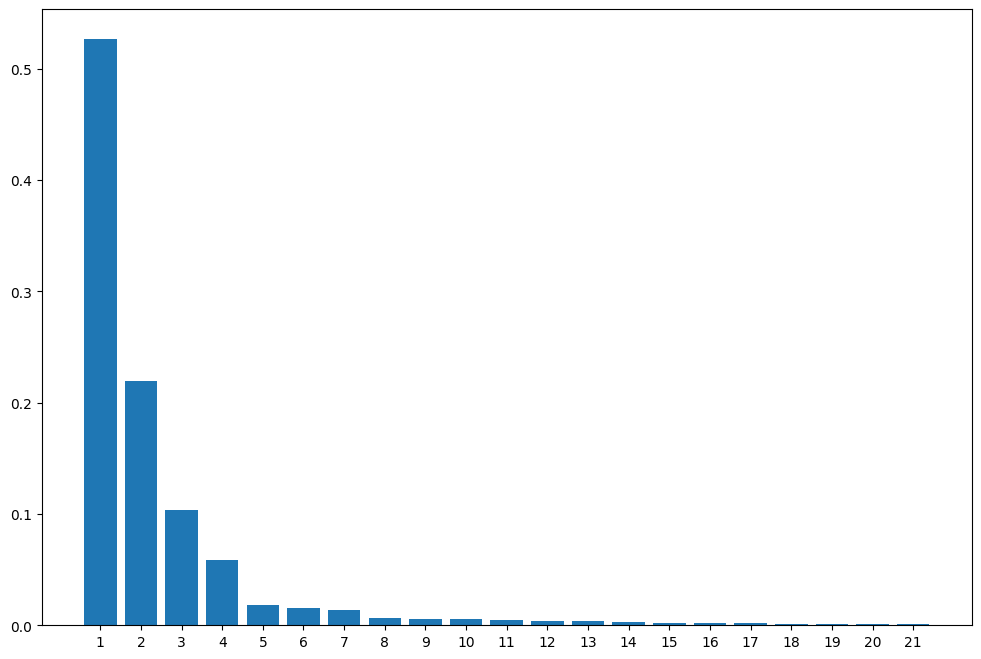

[0.52716376 0.21945171 0.10392615 0.0590364  0.01839137 0.01550227
 0.01382976 0.00643025 0.00546414 0.00527033 0.00481393 0.00392258
 0.00377095 0.00303129 0.00246203 0.00182753 0.00178161 0.00123524
 0.00100724 0.00087043 0.00081104]


In [ ]:
# Observo la varianza de cada componente principal

varianza_explicada = pca.explained_variance_ratio_

# Grafico

plt.figure(figsize=(12,8))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.show()

print(varianza_explicada)

In [ ]:
#Creo un dataframe con los cuatro componentes principales de mayor varianza

vector_pc = ['CP_1', 'CP_2', 'CP_3', 'CP_4']

dfpca_componentes = dfpca[vector_pc].copy()

#Concateno con mi variable a predecir

dfpca_componentes = pd.concat([dfpca_componentes, Y], axis = 1)

print(dfpca_componentes)

            CP_1      CP_2      CP_3      CP_4  Diabetes
0      -1.572174  2.708280  0.132474  0.234566       0.0
1       0.397622  4.511743 -1.919377 -1.678647       0.0
2      -0.751306 -1.422175  1.645330  1.688177       0.0
3      -2.906217 -0.464997 -1.139793  1.315427       0.0
4      -3.028443  1.142039 -1.075412 -1.151846       0.0
...          ...       ...       ...       ...       ...
229776  3.085391  0.055026  4.089751 -0.353622       0.0
229777 -3.464462  2.389382 -1.142157  3.058453       2.0
229778  5.502765  4.145771 -2.185237 -1.533356       0.0
229779  0.269310  4.707964 -1.935904 -0.810298       0.0
229780 -1.488851  3.031008 -1.749662 -1.963697       2.0

[229781 rows x 5 columns]


In [ ]:
#Defino X e Y y divido en training y testing

X = dfpca_componentes.drop('Diabetes', axis=1)
Y = dfpca_componentes['Diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 10000)

## A continuación se aplicarán los mismos modelos que se usaron para Polynomial Features más canaritos, incluida la búsqueda de los mejores hiperparámetros con Bayes Search.

In [ ]:
#Defino qué hiperparámetros usaré para Catboost

hiper_cboost_pca = {
         'learning_rate': Real(0.01, 0.3, 'uniform'),
         'depth': Integer(3, 10),
         'iterations': Integer(10, 100),
}

# Instancio BayesSearchCV

cboost_pca = CatBoostClassifier (random_state = 10000)

bayes_search_cboost_pca = BayesSearchCV(cboost_pca, hiper_cboost_pca, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_cboost_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_cboost_pca.best_params_}')

0:	learn: 0.8186243	total: 133ms	remaining: 9.05s
1:	learn: 0.6897040	total: 247ms	remaining: 8.28s
2:	learn: 0.6153024	total: 363ms	remaining: 7.98s
3:	learn: 0.5686219	total: 474ms	remaining: 7.7s
4:	learn: 0.5387511	total: 590ms	remaining: 7.55s
5:	learn: 0.5188136	total: 693ms	remaining: 7.28s
6:	learn: 0.5062373	total: 810ms	remaining: 7.18s
7:	learn: 0.4969741	total: 922ms	remaining: 7.03s
8:	learn: 0.4910611	total: 1.03s	remaining: 6.86s
9:	learn: 0.4872699	total: 1.11s	remaining: 6.57s
10:	learn: 0.4845542	total: 1.16s	remaining: 6.13s
11:	learn: 0.4827685	total: 1.22s	remaining: 5.8s
12:	learn: 0.4813718	total: 1.27s	remaining: 5.48s
13:	learn: 0.4806511	total: 1.32s	remaining: 5.21s
14:	learn: 0.4801207	total: 1.42s	remaining: 5.11s
15:	learn: 0.4797371	total: 1.57s	remaining: 5.21s
16:	learn: 0.4793204	total: 1.74s	remaining: 5.31s
17:	learn: 0.4789945	total: 1.93s	remaining: 5.47s
18:	learn: 0.4787483	total: 2.13s	remaining: 5.61s
19:	learn: 0.4782935	total: 2.32s	remaining

In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Cboost_Pca = {
    'learning_rate': 0.28,
    'depth': 4,
    'iterations': 69
}

cbc = CatBoostClassifier(**Mejores_Parametros_Cboost_Pca)

cbc.fit(X_train, Y_train)

Y_pred = cbc.predict(X_test)

0:	learn: 0.8204489	total: 282ms	remaining: 19.2s
1:	learn: 0.6923133	total: 433ms	remaining: 14.5s
2:	learn: 0.6175912	total: 556ms	remaining: 12.2s
3:	learn: 0.5705815	total: 665ms	remaining: 10.8s
4:	learn: 0.5401939	total: 828ms	remaining: 10.6s
5:	learn: 0.5196662	total: 979ms	remaining: 10.3s
6:	learn: 0.5067600	total: 1.14s	remaining: 10.1s
7:	learn: 0.4973756	total: 1.33s	remaining: 10.2s
8:	learn: 0.4911209	total: 1.54s	remaining: 10.3s
9:	learn: 0.4874060	total: 1.71s	remaining: 10.1s
10:	learn: 0.4844184	total: 1.89s	remaining: 9.99s
11:	learn: 0.4827699	total: 2.04s	remaining: 9.71s
12:	learn: 0.4814076	total: 2.21s	remaining: 9.51s
13:	learn: 0.4805222	total: 2.36s	remaining: 9.27s
14:	learn: 0.4800555	total: 2.52s	remaining: 9.08s
15:	learn: 0.4793987	total: 2.69s	remaining: 8.9s
16:	learn: 0.4790991	total: 2.8s	remaining: 8.58s
17:	learn: 0.4787141	total: 2.92s	remaining: 8.28s
18:	learn: 0.4784011	total: 3.08s	remaining: 8.1s
19:	learn: 0.4782363	total: 3.21s	remaining:

In [ ]:
# Calculo métricas


accuracy_cboost_pca = accuracy_score(Y_test, Y_pred)

cm_cboost_pca = confusion_matrix(Y_test, Y_pred)

precision_cboost_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_cboost_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_cboost_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_cboost_pca)

print(cm_cboost_pca)

print('Precision: ', precision_cboost_pca)

print('Recall: ', recall_cboost_pca)

print('F1 - score: ', f1_cboost_pca)

Accuracy:  0.8272140422136796
[[56996     0    21]
 [ 1386     0     3]
 [10501     0    28]]
Precision:  0.7666229514830969
Recall:  0.8272140422136796
F1 - score:  0.749690081132296


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Ahora buscaremos los hiperparámetros "óptimos" para XGboost.

hiper_xgboost_pca = {
         'learning_rate': Real(0.05, 0.1, 'uniform'),
         'n_estimators': Integer(100, 400),
         'max_depth': Integer(3, 7),
}

# Instancio BayesSearchCV

xgboost_pca = XGBClassifier (n_stimators = 100, random_state = 10000)

bayes_search_xgboost_pca = BayesSearchCV(xgboost_pca, hiper_xgboost_pca, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_xgboost_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_xgboost_pca.best_params_}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:38:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('learning_rate', 0.0826184708184943), ('max_depth', 6), ('n_estimators', 281)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_XGboost_Pca = {
    'learning_rate': 0.08,
    'max_depth': 6,
    'n_stimators': 281,
}

xgb = XGBClassifier(**Mejores_Parametros_XGboost_Pca)

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:39:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculo métricas


accuracy_xgboost_pca = accuracy_score(Y_test, Y_pred)

cm_xgboost_pca = confusion_matrix(Y_test, Y_pred)

precision_xgboost_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_xgboost_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_xgboost_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_xgboost_pca)

print(cm_xgboost_pca)

print('Precision: ', precision_xgboost_pca)

print('Recall: ', recall_xgboost_pca)

print('F1 - score: ', f1_xgboost_pca)

Accuracy:  0.8271995357945892
[[56968     0    49]
 [ 1383     0     6]
 [10474     0    55]]
Precision:  0.760988654562826
Recall:  0.8271995357945892
F1 - score:  0.7504380106114052


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Defino qué hiperparámetros usaré para LightGBM

hiper_lgbm_pca = {
         'learning_rate': Real(0.01, 0.1, 'uniform'),
         'max_depth': Integer(3, 10),
         'num_leaves': Integer(20, 100),
}

# Instancio BayesSearchCV

lgbm_pca = LGBMClassifier(random_state = 10000)

bayes_search_lgbm_pca = BayesSearchCV(lgbm_pca, hiper_lgbm_pca, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_lgbm_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_lgbm_pca.best_params_}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 160846, number of used features: 4
[LightGBM] [Info] Start training from score -0.189813
[LightGBM] [Info] Start training from score -3.904874
[LightGBM] [Info] Start training from score -1.879003
Best Parameters: OrderedDict([('learning_rate', 0.06871324747328973), ('max_depth', 9), ('num_leaves', 68)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Lgbm_Pca = {
    'learning_rate': 0.06,
    'max_depth': 9,
    'num_leaves': 68,
}

lgbm_pca = LGBMClassifier(**Mejores_Parametros_Lgbm_Pca)

lgbm_pca.fit(X_train, Y_train)

Y_pred = lgbm_pca.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 160846, number of used features: 4
[LightGBM] [Info] Start training from score -0.189813
[LightGBM] [Info] Start training from score -3.904874
[LightGBM] [Info] Start training from score -1.879003


In [ ]:
# Calculo métricas


accuracy_lgbm_pca = accuracy_score(Y_test, Y_pred)

cm_lgbm_pca = confusion_matrix(Y_test, Y_pred)

precision_lgbm_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_lgbm_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_lgbm_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_lgbm_pca)

print(cm_lgbm_pca)

print('Precision: ', precision_lgbm_pca)

print('Recall: ', recall_lgbm_pca)

print('F1 - score: ', f1_lgbm_pca)

Accuracy:  0.8273010807282223
[[56919     0    98]
 [ 1380     0     9]
 [10418     0   111]]
Precision:  0.7628761243265163
Recall:  0.8273010807282223
F1 - score:  0.7520124688343792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Defino qué hiperparámetros usaré para RandomForest

hiper_rforest_pca = {
         'n_estimators': Integer(50, 200),
         'max_depth': Integer(10, 70),
         'min_samples_split': Integer(2, 15),
}

# Instancio BayesSearchCV

rforest_pca = RandomForestClassifier (random_state = 10000)

bayes_search_rforest_pca = BayesSearchCV(rforest_pca, hiper_rforest_pca, n_iter=5, scoring = 'accuracy', cv = 5, random_state=10000, n_jobs = -1, verbose = False)

# Ajustar BayesSearchCV

bayes_search_rforest_pca.fit(X_train, Y_train)

# Imprimir mejores parametros

print(f'Best Parameters: {bayes_search_rforest_pca.best_params_}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_split', 9), ('n_estimators', 199)])


In [ ]:
#Utilizo los mejores parámetros encontrados por BayesSearchCV

Mejores_Parametros_Rforest_Pca = {
    'min_samples_split': 9,
    'max_depth': 16,
    'n_estimators': 199,
}

rfc_pca = RandomForestClassifier(**Mejores_Parametros_Rforest_Pca)

rfc_pca.fit(X_train, Y_train)

Y_pred = rfc_pca.predict(X_test)

In [ ]:
# Calculo métricas


accuracy_rforest_pca = accuracy_score(Y_test, Y_pred)

cm_rforest_pca = confusion_matrix(Y_test, Y_pred)

precision_rforest_pca = precision_score(Y_test, Y_pred, average = 'weighted')

recall_rforest_pca = recall_score(Y_test, Y_pred, average = 'weighted')

f1_rforest_pca = f1_score(Y_test, Y_pred, average = 'weighted')

#Imprimo métricas

print('Accuracy: ', accuracy_rforest_pca)

print(cm_rforest_pca)

print('Precision: ', precision_rforest_pca)

print('Recall: ', recall_rforest_pca)

print('F1 - score: ', f1_rforest_pca)

Accuracy:  0.8278523246536592
[[56770     0   247]
 [ 1363     0    26]
 [10231     0   298]]
Precision:  0.7665533799490958
Recall:  0.8278523246536592
F1 - score:  0.7572009439572398


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Conclusión: aplicar Polynomial Features con los datos normalizados y haciendo tratamiento de outliers da un resultado ligeramente mejor que aplicando PCA. En este caso, el modelo que arroja las mejores métricas es Catboost con Polynomial Features, datos normalizados y tratamiento de outliers. En la próxima entrega se va a implementar SMOTE y Binning/Bucketing para determinar si mejoran las métricas.